In [83]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np
import math
import glob

plt.set_cmap("gray")


<Figure size 432x288 with 0 Axes>

(480, 640, 3)

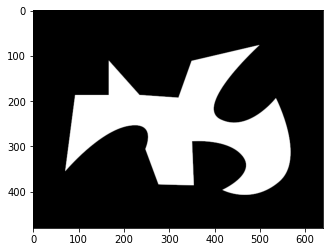

In [84]:
image = cv.imread("img/pattern-01.png")
grey = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image[:, :, ::-1])
image.shape


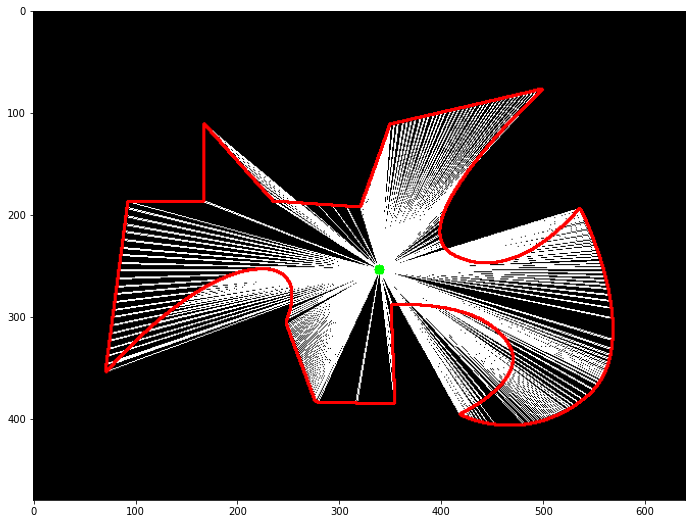

In [85]:
contours, h = cv.findContours(grey, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

m = cv.moments(contours[0])
cx, cy = int(m["m10"] / m["m00"]), int(m["m01"] / m["m00"])

black = np.zeros(image.shape)

for point in contours[0]:
    cv.line(black, (cx, cy), point[0], color=(1, 1, 1), thickness=1)

cv.circle(black, (cx, cy), 5, (0, 1, 0), -1)
cv.drawContours(black, contours, -1, (1, 0, 0), 2)

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
_ = ax.imshow(black)


In [86]:
def approxContours(cntr, epsilon=0.1):
    peri = cv.arcLength(cntr, True)
    return cv.approxPolyDP(cntr, epsilon * peri, True)


def distance(p1, p2) -> int:
    s1, s2 = np.subtract(p1, p2)
    return math.sqrt(s1 ** 2 + s2 ** 2)


def getCenter(cntr):
    m = cv.moments(cntr)
    return int(m["m10"] / m["m00"]), int(m["m01"] / m["m00"])


In [87]:
def run_test(img):
    black = np.zeros(img.shape)
    grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    contours, h = cv.findContours(grey, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    apx = approxContours(contours[0], 0.01)

    cx, cy = getCenter(contours[0])

    distance_edges = [distance((cx, cy), p[0]) for p in apx]
    avg = np.average(distance_edges)

    cv.circle(black, (cx, cy), int(avg), color=(0, 1, 1), thickness=2)

    for point in apx:
        r = distance((cx, cy), point[0])
        cv.line(black, (cx, cy), point[0], color=(1, 1, 1), thickness=1)

    cv.circle(black, (cx, cy), 5, (0, 1, 0), -1)
    cv.drawContours(black, contours, -1, (1, 0, 0), 4)

    ellipse = cv.fitEllipse(apx)
    cv.ellipse(black, ellipse, (0, 255, 0), 2)

    rect = cv.minAreaRect(apx)
    box = cv.boxPoints(rect).astype(np.int0)

    cv.drawContours(black, [box], 0, (0, 0, 255), 2)

    return black


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


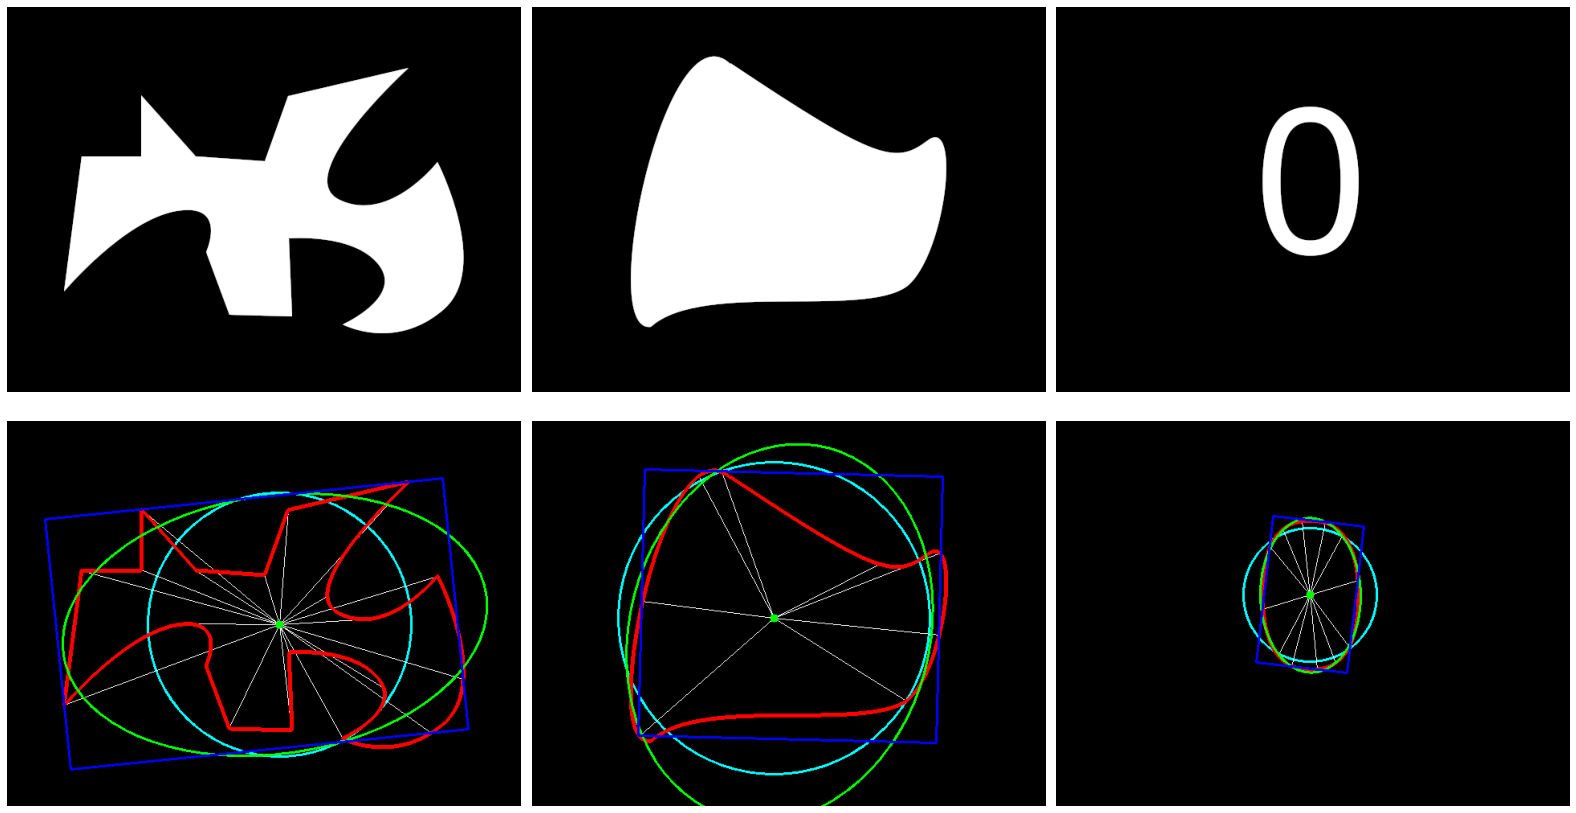

In [88]:
images = [cv.imread(f) for f in glob.glob("img/pattern-*.png")]

fig, ax = plt.subplots(2, 3)
fig.set_tight_layout(True)
fig.set_size_inches(22, 12)
for ix, img in enumerate(images[::-1]):
    _ = ax[0, ix].imshow(img)
    ax[0, ix].axis("off")
    _ = ax[1, ix].imshow(run_test(img))
    ax[1, ix].axis("off")


In [89]:
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
contours, h = cv.findContours(grey, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
print(contours[0].shape)
m = cv.moments(contours[0], True)

print(m)
for key in m:
    if len(key) == 3:
        value = m[key]/m['m00']
        print(f"{key} / m00 = {value}")


(198, 1, 2)
{'m00': 18464.0, 'm10': 5843633.0, 'm01': 4013859.0, 'm20': 1866916697.6666665, 'm11': 1270562975.3333333, 'm02': 914839302.3333333, 'm30': 601920222707.5, 'm21': 405987412449.0, 'm12': 289631106305.6667, 'm03': 217256945116.5, 'mu20': 17477429.973371506, 'mu11': 225079.4414896965, 'mu02': 42273007.27911973, 'mu30': 844683.7174072266, 'mu21': -1049015.6582655907, 'mu12': -2343168.7656993866, 'mu03': 2192697.0301818848, 'nu20': 0.05126559328977232, 'nu11': 0.0006602132649297049, 'nu02': 0.12399710950687791, 'nu30': 1.8233903157251728e-05, 'nu21': -2.2644748003392507e-05, 'nu12': -5.058119562906369e-05, 'nu03': 4.733301291074219e-05}
m00 / m00 = 1.0
m10 / m00 = 316.48792244367417
m01 / m00 = 217.3883773830156
m20 / m00 = 101111.17296721548
m11 / m00 = 68812.98609907567
m02 / m00 = 49547.189251155396
m30 / m00 = 32599665.44126408
m21 / m00 = 21988053.10057409
m12 / m00 = 15686260.090211583
m03 / m00 = 11766515.658389298


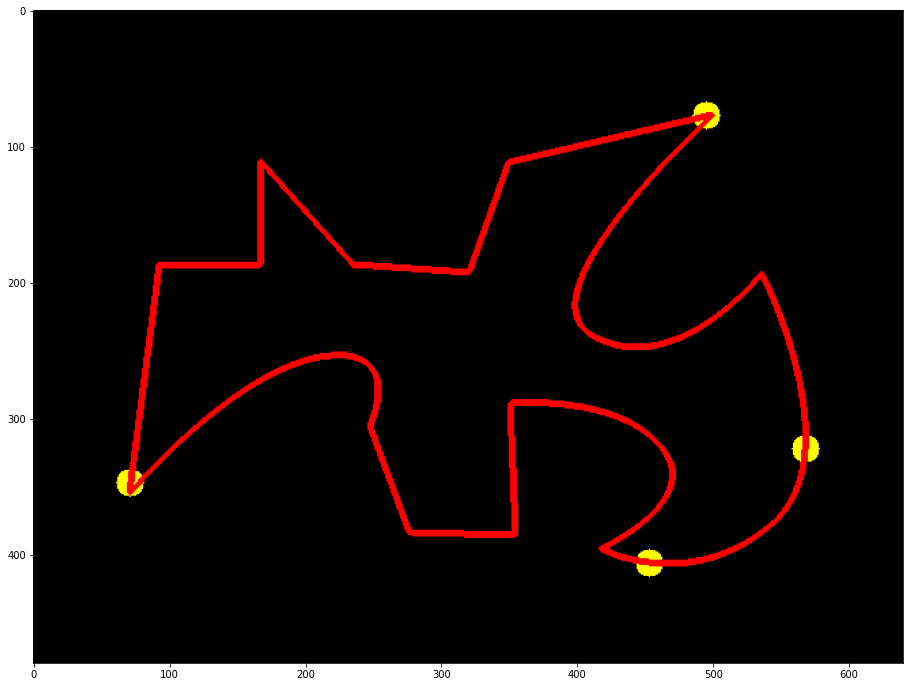

In [124]:
img = images[2]
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

contours, h = cv.findContours(grey, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

black = np.zeros(images[2].shape)
# print(cnt.shape)
x, y = tuple(cnt[cnt[:, :, 0].argmin()][0])
cv.circle(black, (x, y), 10, (1,1,0), -1)

x, y = tuple(cnt[cnt[:, :, 0].argmax()][0])
cv.circle(black, (x, y), 10, (1,1,0), -1)

x, y = tuple(cnt[cnt[:, :, 1].argmin()][0])
cv.circle(black, (x, y), 10, (1,1,0), -1)

x, y = tuple(cnt[cnt[:, :, 1].argmax()][0])
cv.circle(black, (x, y), 10, (1,1,0), -1)

cv.drawContours(black, [cnt], -1, 1, 3)

f, a = plt.subplots()
f.set_size_inches(21,12)
a.imshow(black)
